### Support Vector Machine 

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('numerical_chestxray_values.xlsx', sheet_name='Sheet1')

X=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data



### Model training

In [2]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=77,stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

svm = SVC()

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

grid_search = GridSearchCV(svm, param_grid, cv=10)  


grid_search.fit(X_train, y_train)  

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


### Metrics


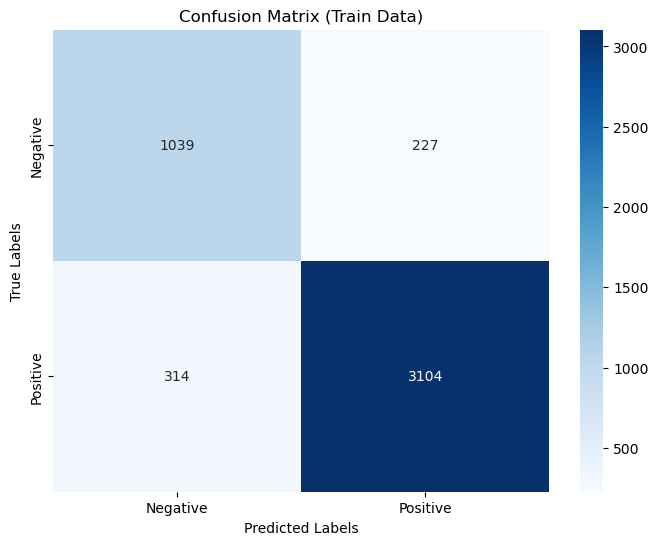

Accuracy: 0.8845004269854825
Precision: 0.9318522966076254
Recall: 0.9081334113516677
F1-Score: 0.9198399762927842
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      1266
           1       0.93      0.91      0.92      3418

    accuracy                           0.88      4684
   macro avg       0.85      0.86      0.86      4684
weighted avg       0.89      0.88      0.89      4684



In [3]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns

best_svm = grid_search.best_estimator_
y_train_pred = best_svm.predict(X_train)

# Calculate metrics
TP = np.sum((y_train == 1) & (y_train_pred == 1))
FP = np.sum((y_train == 0) & (y_train_pred == 1))
TN = np.sum((y_train == 0) & (y_train_pred == 0))
FN = np.sum((y_train == 1) & (y_train_pred == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_train, y_train_pred))

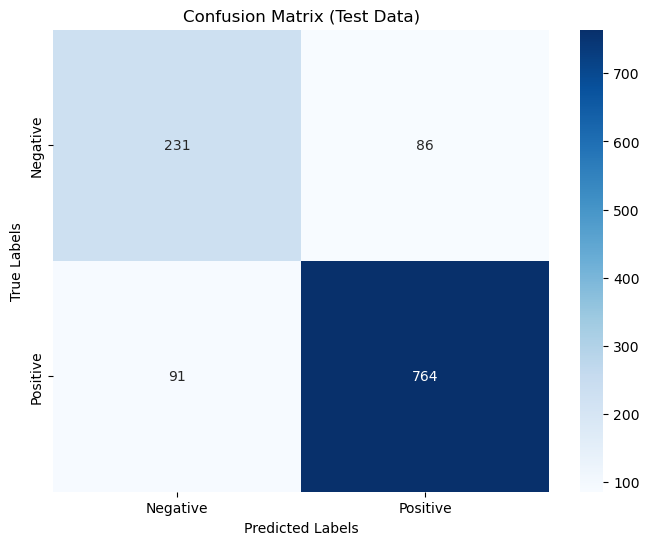

Accuracy: 0.8489761092150171
Precision: 0.8988235294117647
Recall: 0.8935672514619883
F1-Score: 0.8961876832844576
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       317
           1       0.90      0.89      0.90       855

    accuracy                           0.85      1172
   macro avg       0.81      0.81      0.81      1172
weighted avg       0.85      0.85      0.85      1172



In [4]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns

y_pred = best_svm.predict(X_test)

# Calculate metrics
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FN = np.sum((y_test == 1) & (y_pred == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))